# Objective

**Day 5 of the [#30DayChartChallenge challenge](https://github.com/Z3tt/30DayChartChallenge_Collection2021/blob/main/README.md)**

**Topic: 5. slope**

Used Dataset: https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt

# Setup

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

# Read Data

In [101]:
df_global_temp = pd.read_csv("../data/globalT/global_temp_yearly.txt", header=2, sep="\t", 
                             infer_datetime_format=True, parse_dates={'year':['Year']})
df_global_temp.head() 

,year,No_Smoothing,Lowess(5)
0,1880-01-01,-0.16,-0.08
1,1881-01-01,-0.07,-0.12
2,1882-01-01,-0.10,-0.16
3,1883-01-01,-0.16,-0.19
4,1884-01-01,-0.27,-0.23


# Data Preparation

In [102]:
df_global_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   year          141 non-null    datetime64[ns]
 1   No_Smoothing  141 non-null    float64       
 2   Lowess(5)     141 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 3.4 KB


In [103]:
df_global_temp.set_index('year', inplace=True)
df_global_temp.head()

,No_Smoothing,Lowess(5)
year,,
1880-01-01,-0.16,-0.08
1881-01-01,-0.07,-0.12
1882-01-01,-0.10,-0.16
1883-01-01,-0.16,-0.19
1884-01-01,-0.27,-0.23


In [104]:
df_global_temp.tail()

,No_Smoothing,Lowess(5)
year,,
2016-01-01,1.02,0.88
2017-01-01,0.93,0.91
2018-01-01,0.85,0.95
2019-01-01,0.98,0.98
2020-01-01,1.02,1.01


In [113]:
# calculate slopes: 1880-1959 and 1960-2020
slope1 = np.polyfit(range(len(df_global_temp.loc['1880-01-01':'1959-01-01'])), df_global_temp.loc['1880-01-01':'1959-01-01']["No_Smoothing"], 1)
slope2 = np.polyfit(range(len(df_global_temp.loc['1960-01-01':'2020-01-01'])), df_global_temp.loc['1960-01-01':'2020-01-01']["No_Smoothing"], 1)
print(f'Global mean Temperature Tendency 1880 - 1959 {slope1[0]:.2}°C')
print(f'Global mean Temperature Tendency 1960 - 2020 {slope2[0]:.2}°C')

Global mean Temperature Tendency 1880 - 1959 0.0036°C
Global mean Temperature Tendency 1960 - 2020 0.017°C


In [126]:
x1 = range(len(df_global_temp.loc['1880-01-01':'1959-01-01'].index))
x2 = range(len(df_global_temp.loc['1960-01-01':'2020-01-01'].index))
trend1 = slope1[0] * x1 + slope1[1]
trend2 = slope2[0] * x2 + slope2[1]

In [149]:
# total rise:
years1 = 1959 - 1880 + 1
years2 = 2020 - 1960 + 1
total1 = slope1[0] * years1
total2 = slope2[0] * years2
print(f'Total rise in 1880 - 1959: {total1:.2f}°C')
print(f'Total rise in 1960 - 2020: {total2:.2f}°C')

Total rise in 1880 - 1959: 0.29°C
Total rise in 1960 - 2020: 1.06°C


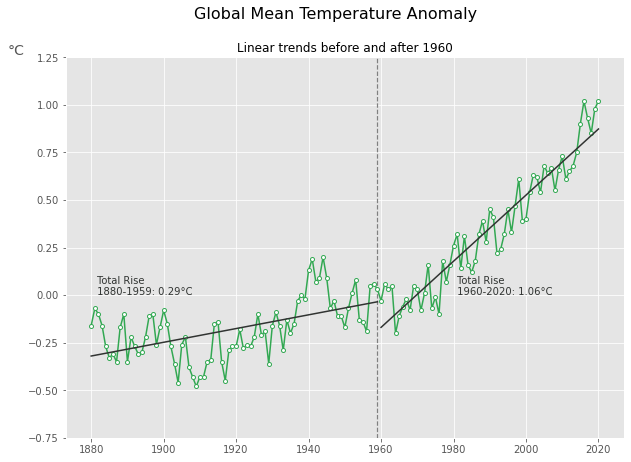

In [161]:
time0 = pd.to_datetime('1880101', format='%Y%m%d')
time1 = pd.to_datetime('19590101', format='%Y%m%d')
time2 = pd.to_datetime('19800101', format='%Y%m%d')
fig, ax = plt.subplots(1, 1, figsize=(10,7))
ax.plot(df_global_temp.index, df_global_temp["No_Smoothing"],color='#32a852', marker='o',
           markerfacecolor='white', markersize=4)
ax.plot(df_global_temp.loc['1880-01-01':'1959-01-01'].index, trend1, color="#303331")
ax.plot(df_global_temp.loc['1960-01-01':'2020-01-01'].index, trend2, color="#303331")
ax.vlines(x=time1, ymin=-.75, ymax=1.25, color="grey", linestyle='dashed', linewidth=1.2)
ax.set_ylabel("°C",loc="top",rotation=0, fontsize=14)
ax.set_ylim(-.75,1.25)
ax.text(x=time0, y=.0, s=f" Total Rise\n 1880-1959: {total1:.2f}°C", color='#303331')
ax.text(x=time2, y=.0, s=f" Total Rise\n 1960-2020: {total2:.2f}°C", color='#303331')
#ax.legend(labels=["Global mean Temperature","","",""])
plt.suptitle("Global Mean Temperature Anomaly", fontsize=16)
plt.title("Linear trends before and after 1960", fontsize=12);
plt.savefig("../plots/day5_slope.png");